# Problem Statement: Machine Learning 7
In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

# Data Description :
    
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
    
    
    
Here are some selected columns from the data:
* player - name of the player
* pos - the position of the player
* g - number of games the player was in
* gs - number of games the player started
* pts - total points the player scored

There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

***

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  mean_squared_error ,r2_score
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [2]:
nba = pd.read_csv('nba_2013.csv')

In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

# SUMMARY STATISTICS

In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

#### Check for null values in the dataframe

In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
nba[nba['x3p.'].isnull()].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,...,27,55,6,9,11,14,49,38,2013-2014,2013
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,...,23,38,2,3,12,3,17,28,2013-2014,2013


In [8]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [9]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

#### Note
Since there is no variation in data for features season and season_end so it will have no impact in making predictions.
Hence removing these features from the feature list

#### retrieve features having datatype as Object

In [10]:
feat_list_obj = []
for i in nba.columns:
    if nba[i].dtype == 'object':
        feat_list_obj.append(i)

In [11]:
feat_list_obj

['player', 'pos', 'bref_team_id', 'season']

In [12]:
# prepare the list of features to be dropped from the Features to be used to train the model

In [13]:
feat_drop_list = feat_list_obj + ['season_end','pts']
feat_drop_list

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [14]:
Features = nba.drop(feat_drop_list,axis=1)
Labels = nba['pts'] #### to make predictions for pts hence used as label
print(Features.shape)
print(Labels.shape)

(481, 25)
(481,)


In [15]:
Features.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
dtype: int64

# DATA IMPUTATION

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We have replaced missing values with corresponding feature's median value.

In [16]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(Features) ####--> Independent Variable
Y = Labels.values ####---> Dependent Values

In [17]:
Features.shape,X.shape,Y.shape

((481, 25), (481, 25), (481,))

# DATA VISUALIZATION

In [18]:
Sample = Features.dropna()

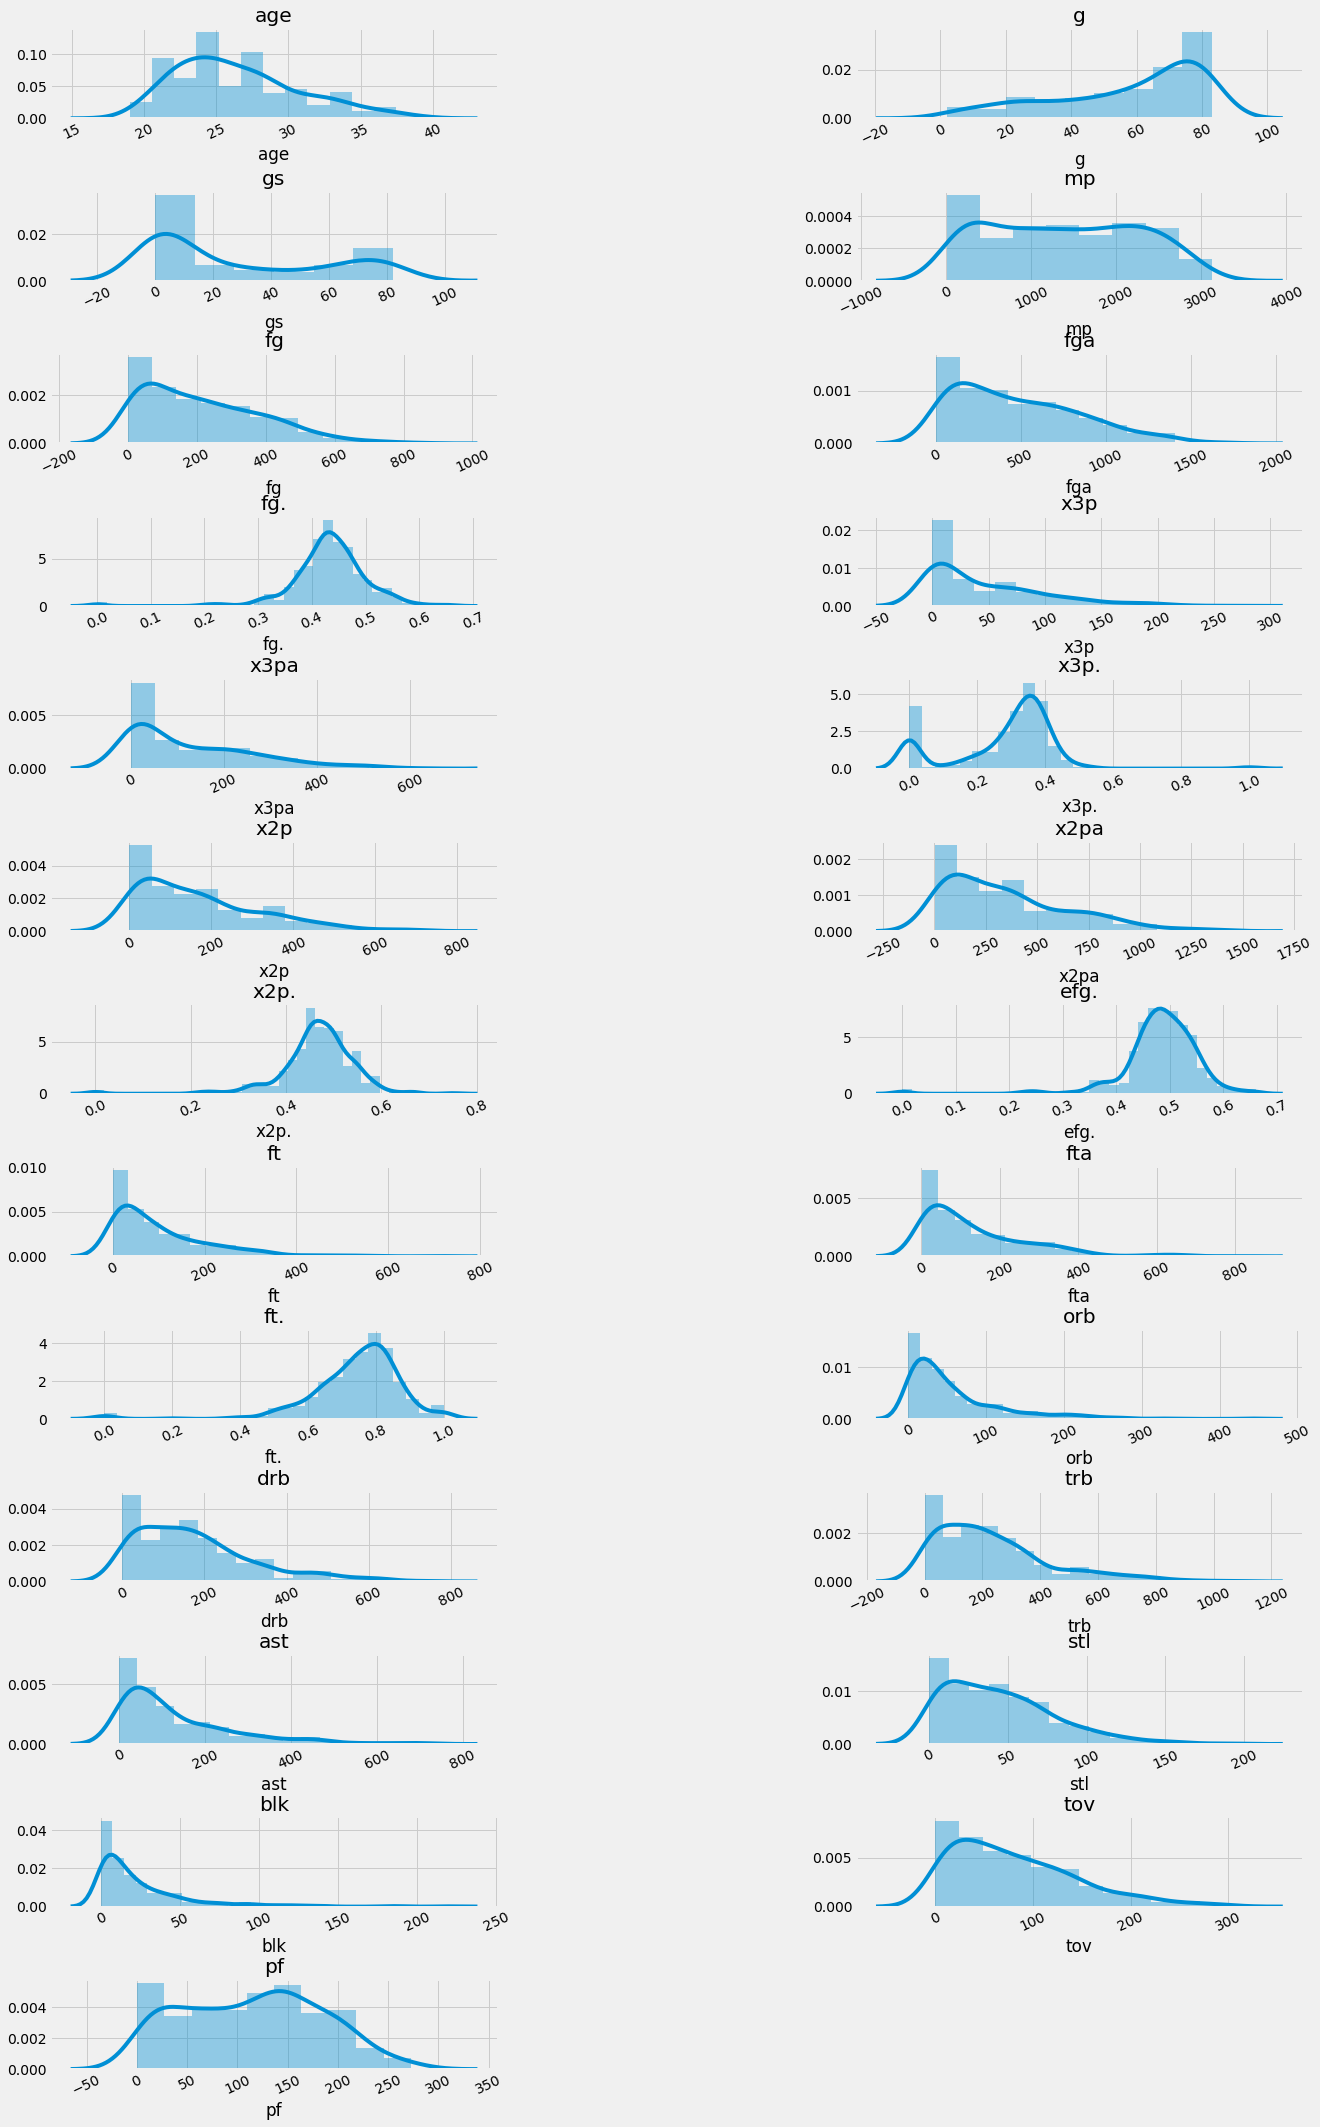

In [19]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            #plt.show()
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
            #plt.show()
plot_distribution(Sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

# TEST TRAIN SPLIT the sample data

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(384, 25)
(97, 25)
(384,)
(97,)


In [21]:
sns.set_style('whitegrid')
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value )
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)
       

RMSE is  109.68530429999018  for K-Value: 1
RMSE is  94.71292762761487  for K-Value: 2
RMSE is  97.62527417669874  for K-Value: 3
RMSE is  96.14675812495263  for K-Value: 4
RMSE is  83.29922710994022  for K-Value: 5
RMSE is  83.0387801177042  for K-Value: 6
RMSE is  88.7759207605298  for K-Value: 7
RMSE is  94.66335241236945  for K-Value: 8
RMSE is  97.96931606717861  for K-Value: 9
RMSE is  103.49740471869406  for K-Value: 10
RMSE is  106.19503735548705  for K-Value: 11
RMSE is  109.1873993323716  for K-Value: 12
RMSE is  107.77454037244564  for K-Value: 13
RMSE is  111.39746743105337  for K-Value: 14
RMSE is  114.8307391265033  for K-Value: 15
RMSE is  117.52106033156859  for K-Value: 16
RMSE is  120.39243270163412  for K-Value: 17
RMSE is  121.85591429029819  for K-Value: 18
RMSE is  123.26325728524043  for K-Value: 19
RMSE is  126.47912331298244  for K-Value: 20


#### Note
It shows that we are get less error for values of  K = 5,6 .

In [22]:
K_value = 6
neigh = KNeighborsRegressor(n_neighbors = K_value)
neigh.fit(X_train, Y_train) 
Y_pred = neigh.predict(X_test)
print("RMSE for KNN Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)
print("R Squared for KNN Regressor is ",r2_score(Y_test,Y_pred))

RMSE for KNN Regressor is  83.0387801177042  for K-Value: 6
R Squared for KNN Regressor is  0.9748342374517244


#### R Squared is a statistical measure of how close the data points are to thr fitted regression line.

Text(0.5, 1.0, 'Actual vs Predicted points')

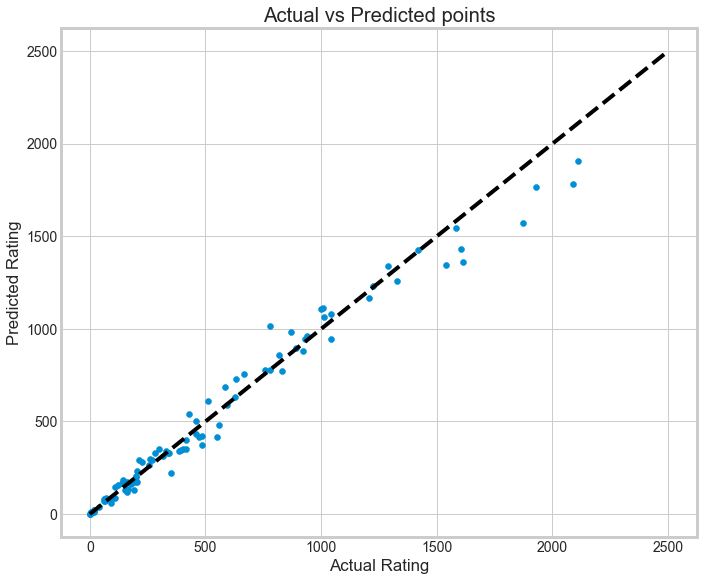

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points")

# Applying Random Forest Regressor to predict NBA players score

In [24]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=1)
RFreg.fit(X_train,Y_train)
Y_pred = RFreg.predict(X_test)
print("RMSE for Random Forest Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test)))
print("R Squared for Random Forest Regressor is ",r2_score(Y_test,Y_pred))

RMSE for Random Forest Regressor is  47.194587318515126
R Squared for Random Forest Regressor is  0.9918710854350188


Text(0.5, 1.0, 'Actual vs Predicted points- Random Forest Regressor')

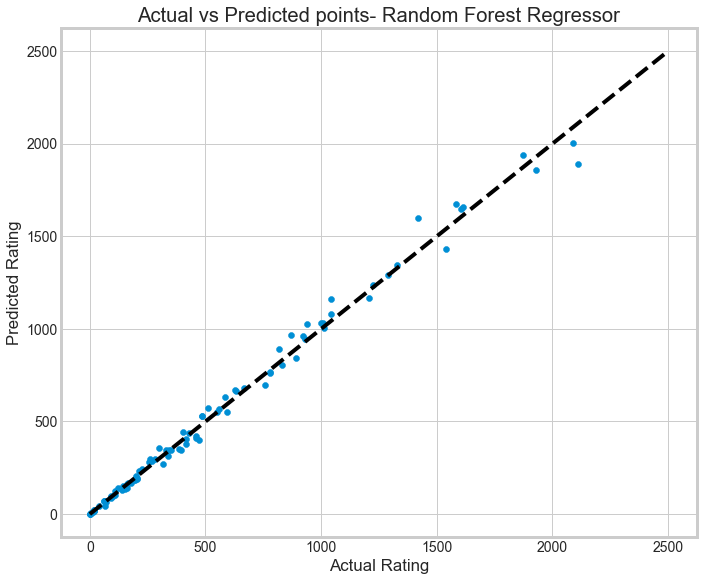

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points- Random Forest Regressor")

In [26]:
for depth in range(30):
    depth = depth + 1
    RFreg = RandomForestRegressor(max_depth=depth,random_state=1)
    RFreg.fit(X_train,Y_train)
    Y_pred = RFreg.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for max_depth ",depth)

RMSE is  283.5815729141861  for max_depth  1
RMSE is  149.25928520064966  for max_depth  2
RMSE is  77.18244069075112  for max_depth  3
RMSE is  67.99419414505138  for max_depth  4
RMSE is  49.91505147709011  for max_depth  5
RMSE is  49.1093129791732  for max_depth  6
RMSE is  55.8707383790166  for max_depth  7
RMSE is  45.12073435121306  for max_depth  8
RMSE is  55.05631767687581  for max_depth  9
RMSE is  41.51120524329299  for max_depth  10
RMSE is  49.456626628564806  for max_depth  11
RMSE is  42.408358444761575  for max_depth  12
RMSE is  47.194587318515126  for max_depth  13
RMSE is  47.194587318515126  for max_depth  14
RMSE is  47.194587318515126  for max_depth  15
RMSE is  47.194587318515126  for max_depth  16
RMSE is  47.194587318515126  for max_depth  17
RMSE is  47.194587318515126  for max_depth  18
RMSE is  47.194587318515126  for max_depth  19
RMSE is  47.194587318515126  for max_depth  20
RMSE is  47.194587318515126  for max_depth  21
RMSE is  47.194587318515126  for 

#### Note 
The random forest regressor gives a low RMSE value for maxdepth = 13 and the RMSE remains constant aftermath.

# CONCLUSION

* The R Squared for KNN Regressor is  0.974834237452
* The R Squared for Random Forest Regressor is  0.991871085435

R Squared is a statistical measure of how close the sample data points are to the fitted regression line.

As also evident from the plot Random Forest Regressor gives a better prediction for the NBA players score as the data point are more fitted to the regression line compared to that of KNN Regressor.


***

# Problem Statement: Machine Learning 8

In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

***

In [27]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
import re
from collections import Counter
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [28]:
text = soup.getText()

In [29]:
words = re.findall(r'\w+', text.lower())

In [30]:
Counter(words).most_common(10)

[('the', 408),
 ('php', 251),
 ('7', 146),
 ('for', 146),
 ('release', 132),
 ('in', 126),
 ('of', 123),
 ('can', 96),
 ('3', 93),
 ('be', 91)]

In [31]:
Counter(words)

Counter({'php': 251,
         'hypertext': 1,
         'preprocessor': 1,
         'downloads': 39,
         'documentation': 1,
         'get': 1,
         'involved': 1,
         'help': 2,
         'getting': 1,
         'started': 2,
         'introduction': 2,
         'a': 50,
         'simple': 1,
         'tutorial': 1,
         'language': 3,
         'reference': 2,
         'basic': 2,
         'syntax': 1,
         'types': 1,
         'variables': 2,
         'constants': 1,
         'expressions': 1,
         'operators': 1,
         'control': 2,
         'structures': 1,
         'functions': 1,
         'classes': 2,
         'and': 90,
         'objects': 1,
         'namespaces': 1,
         'errors': 1,
         'exceptions': 2,
         'generators': 1,
         'references': 1,
         'explained': 1,
         'predefined': 3,
         'interfaces': 1,
         'context': 1,
         'options': 1,
         'parameters': 1,
         'supported': 1,
         'proto

***

# Problem Statement: Machine Learning 9

In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.The raw image is available in spicy.misc package with the name face.

***

In [32]:
#import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster
from scipy.misc import face
from skimage.measure import compare_ssim as ssim

In [33]:
#load face from scipy.misc
face = face(gray=True)

#### Use of KMeans Clustering on a image represented vectors

In [34]:
#Apply K-Means clustoring
n_clusters = 5
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array for KMeans clustoring
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
print(values)
print(labels)

[111.62805703  27.11166441 192.8878986   73.35388722 150.24313581]
[0 0 4 ... 4 4 4]


In [36]:
# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()
print(vmin)
print(vmax)

0
250


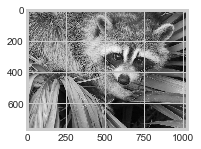

In [37]:
# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256);

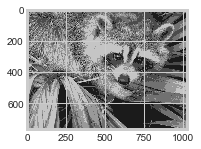

In [38]:
# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax);

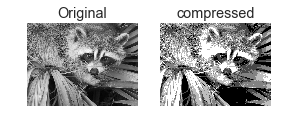

In [39]:
# load the images -- original and compressed
original = face
compressed = face_compressed

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("compressed", compressed)

# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

#### Check similarity between two impages using function "compare_images"
Used mean squared error(MSE) and structural similarity(SSIM) to check similarity between two images MSE equal to 0 and SSIM equals to 1 means two images are similar to each other, otherwise not.

In [40]:
def mse(imageA, imageB):
    # 'Mean Squared Error', NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar" the two images are
    return err

def compare_images(imageA, imageB, title):
    # compute the MSE and structural similarity index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA.astype('float'), imageB.astype('float'))

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

MSE and SSIM between same image : 


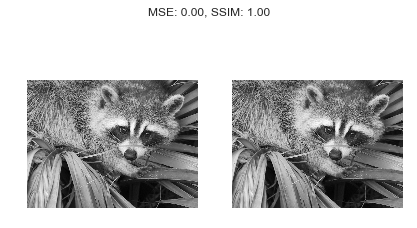

In [41]:
# compare the images
print("MSE and SSIM between same image : ")
compare_images(original, original, "Original vs. Original")

MSE and SSIM between original and compressend images : 


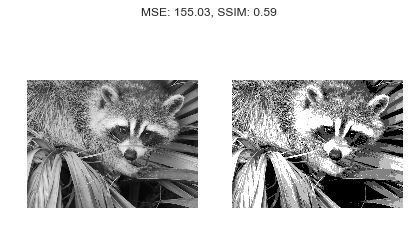

In [42]:
print("MSE and SSIM between original and compressend images : ")
compare_images(original, compressed, "Original vs. compressed")

***

# Problem Statement: Machine Learning 10

***

In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

***

#### Import libraries into working environment

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA

#### Load iris data set

In [44]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Number of samples:")

print(X.shape[0])
print('---------------------------------------------------------------------------')
print('Number of features :')
print(X.shape[1])
print('---------------------------------------------------------------------------')
print("Feature names:")
print('---------------------------------------------------------------------------')
print(iris.feature_names)

Number of samples:
150
---------------------------------------------------------------------------
Number of features :
4
---------------------------------------------------------------------------
Feature names:
---------------------------------------------------------------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Feature scaling prior to applying PCA


In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print('shape of scaled data points:')
print('---------------------------------------------------------------------------')
print(X_scaled.shape)
print('first 5 rows of scaled data points :')
print('---------------------------------------------------------------------------')
print(X_scaled[:5,:])

shape of scaled data points:
---------------------------------------------------------------------------
(150, 4)
first 5 rows of scaled data points :
---------------------------------------------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


#### looking at the explained variance as a function of the components

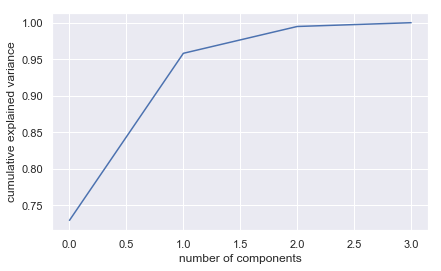

In [46]:
sns.set()
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here we see that we need about 3 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations.

#### PCA using Eigen-decomposition: 5-step process

In [47]:
# 1. Normalize columns of A so that each feature has zero mean
A0 = iris.data
mu = np.mean(A0,axis=0)
A = A0 - mu
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))
print('--------------------------------------------------------------------------')
print('Mean value : ')
print('--------------------------------------------------------------------------')
print(mu)
print('Standardized Feature value first 5 rows: ')
print('--------------------------------------------------------------------------')
print(A[:5,:])

# 2. Compute sample covariance matrix Sigma = {A^TA}/{(m-1)}
#covariance matrix can also be computed using np.cov(A.T)
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("--------------------------------------------------------------------------")
print("Sigma:")
print(Sigma)

# 3. Perform eigen-decomposition of Sigma using `np.linalg.eig(Sigma)`
W,V = np.linalg.eig(Sigma)
print("---------------------------------------------------------------------------")
print("Eigen values:")
print(W)
print("---------------------------------------------------------------------------")
print("Eigen vectors:")
print(V)

# 4. Compress by ordering 3 eigen vectors according to largest eigen values and compute AX_k
print("----------------------------------------------------------------------------")
print("Compressed - 4D to 3D:")
print("----------------------------------------------------------------------------")
print('First 3 eigen vectors :')
print(V[:,:3] )
print("----------------------------------------------------------------------------")
Acomp = A @ V[:,:3] 
print('First first five rows of transformed features :')
print("----------------------------------------------------------------------------")
print(Acomp[:5,:]) 


# 5. Reconstruct from compressed version by computing $A V_k V_k^T$
print("----------------------------------------------------------------------------")
print("Reconstructed version - 3D to 4D:")
print("----------------------------------------------------------------------------")
Arec = A @ V[:,:3] @ V[:,:3].T # first 3 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original

Does A have zero mean across rows?
[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
--------------------------------------------------------------------------
Mean value : 
--------------------------------------------------------------------------
[5.84333333 3.05733333 3.758      1.19933333]
Standardized Feature value first 5 rows: 
--------------------------------------------------------------------------
[[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]
--------------------------------------------------------------------------
Sigma:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
-----------------------------

#### Original iris feature values

In [48]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### 3D Visualization

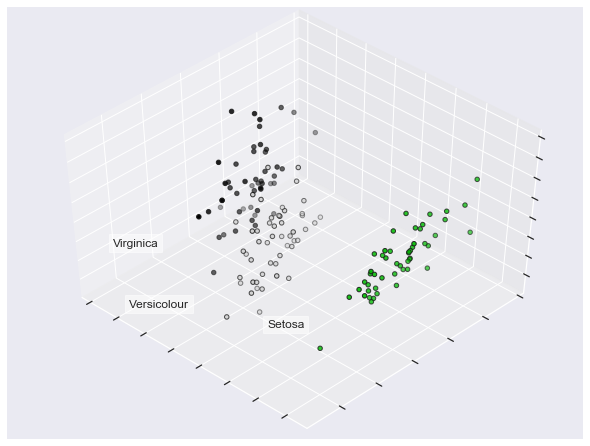

In [49]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
y= iris.target
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(Acomp[y == label, 0].mean(),
              Acomp[y == label, 1].mean() + 1.5,
              Acomp[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(Acomp[:, 0], Acomp[:, 1], Acomp[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Applying PCA for number of compents = 3 using sklearn

In [50]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X.shape)
print('--------------------------------------------------------------------')
print('Retransformed  Feature  :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])

explained variance :
--------------------------------------------------------------------
[2.93808505 0.9201649  0.14774182]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[ 2.64026976  5.2040413  -2.48862071]
 [ 2.6707303   4.66690995 -2.46689833]
 [ 2.45460631  4.77363639 -2.28832134]
 [ 2.54551709  4.64846339 -2.2123776 ]
 [ 2.56122842  5.2586291  -2.39222589]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(150, 3)
-----------

In [51]:
print('First Principal Component PC1: ',pca.components_[0])
print('\nSecond Principal Component PC2: ',pca.components_[1])
print('\nThird Principal Component PC3: ',pca.components_[2])

First Principal Component PC1:  [ 0.52106591 -0.26934744  0.5804131   0.56485654]

Second Principal Component PC2:  [0.37741762 0.92329566 0.02449161 0.06694199]

Third Principal Component PC3:  [-0.71956635  0.24438178  0.14212637  0.63427274]


Transforming from 4D to 3D using PCA

#### 3D visualization


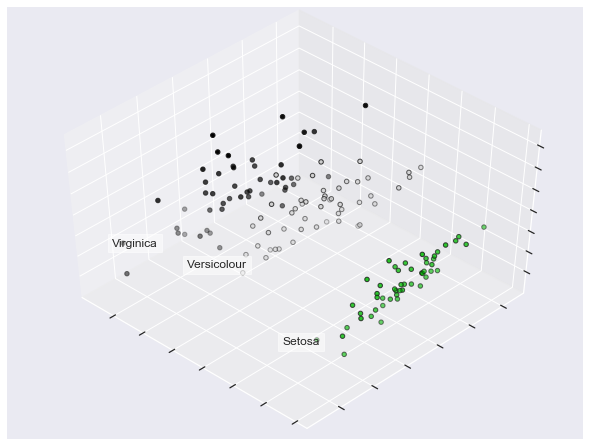

In [52]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
y= iris.target
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_transformed[y == label, 0].mean(),
              X_transformed[y == label, 1].mean() + 1.5,
              X_transformed[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

***

# Problem Statement: Machine Learning 11

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

***

In [53]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
def parser(x):
    m = x.split('-')[0]
    if len(m) < 2:
        return datetime.strptime('190'+x, '%Y-%b')
    else:
        return datetime.strptime('19'+x, '%Y-%b')

In [55]:
df = pd.read_csv('Shampoo_Sales.csv')

In [56]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [57]:
df.describe()

,Sales of shampoo over a three year period
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [58]:
df.isnull().count()

Month                                        37
Sales of shampoo over a three year period    37
dtype: int64

In [59]:
df['Month'] = df['Month'].astype(str)

In [60]:
df.dtypes

Month                                         object
Sales of shampoo over a three year period    float64
dtype: object

In [61]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [62]:
df.isnull().count()

Month                                        37
Sales of shampoo over a three year period    37
dtype: int64

In [63]:
df.dropna(inplace = True)

In [64]:
df.set_index('Month',inplace=True)

In [65]:
df.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


### Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:
Visualize the Time Series Data
Make the time series data stationary
Plot the Correlation and AutoCorrelation Charts
Construct the ARIMA Model
Use the model to make predictions


#### Visualize Data


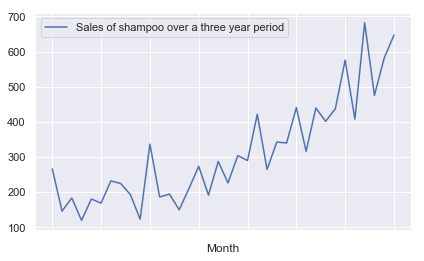

In [66]:
df.plot();

We can see that the Shampoo Sales dataset has a clear trend.
This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1

#### Autocorrelation plot of the time series. This is also built-in to Pandas.


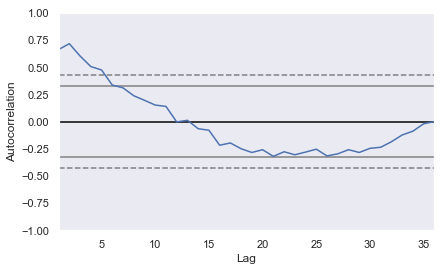

In [67]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df);

Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.
A good starting point for the AR parameter of the model may be 5.

In [68]:
 df['Shampoo_Sales']=df['Sales of shampoo over a three year period']
df.drop(['Sales of shampoo over a three year period'],axis=1,inplace=True)
df.head()

,Shampoo_Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [69]:
timeseries = df['Shampoo_Sales']

In [70]:
timeseries.index

Index(['1-01', '1-02', '1-03', '1-04', '1-05', '1-06', '1-07', '1-08', '1-09',
       '1-10', '1-11', '1-12', '2-01', '2-02', '2-03', '2-04', '2-05', '2-06',
       '2-07', '2-08', '2-09', '2-10', '2-11', '2-12', '3-01', '3-02', '3-03',
       '3-04', '3-05', '3-06', '3-07', '3-08', '3-09', '3-10', '3-11', '3-12'],
      dtype='object', name='Month')

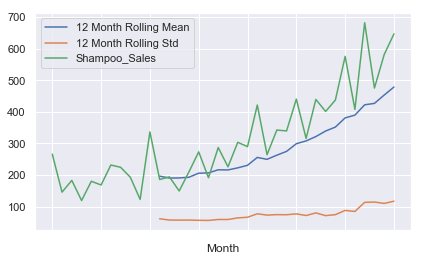

In [71]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

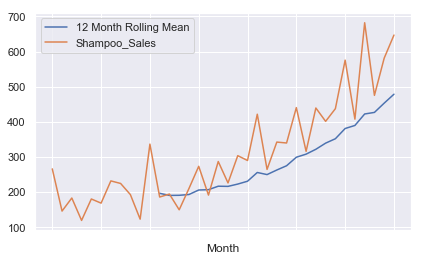

In [72]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

#### Testing for Stationarity
We can use the Augmented Dickey-Fuller unit root test.
In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.
Basically, we are trying to whether to accept the Null Hypothesis H0 (that the time series has a unit root, indicating it is non-stationary) or reject H0 and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).
We end up deciding this based on the p-value return.
A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
Let's run the Augmented Dickey-Fuller test on our data:

In [73]:
df.head()

,Shampoo_Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
Shampoo_Sales    36 non-null float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [75]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Shampoo_Sales'])
result

(3.0601420836411806,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

In [76]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.0601420836411806
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [77]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [78]:
adf_check(df['Shampoo_Sales'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.0601420836411806
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data! Typically financial stock data won't be seasonal, but that is kind of the point of this section, to show you common methods, that won't work well on stock finance data!

#### Differencing
The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [79]:
df['Shampoo_Sales_first_difference'] = df['Shampoo_Sales'] - df['Shampoo_Sales'].shift(1)

In [80]:
df.head()

,Shampoo_Sales,Shampoo_Sales_first_difference
Month,,
1-01,266.0,NaN
1-02,145.9,-120.1
1-03,183.1,37.2
1-04,119.3,-63.8
1-05,180.3,61.0


In [81]:
adf_check(df['Shampoo_Sales_first_difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


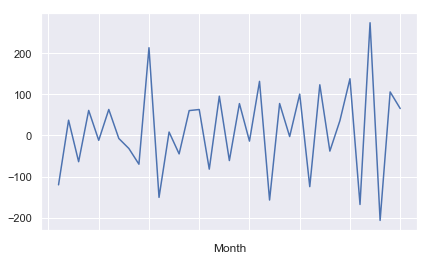

In [82]:
df['Shampoo_Sales_first_difference'].plot();

#### Seasonal Difference

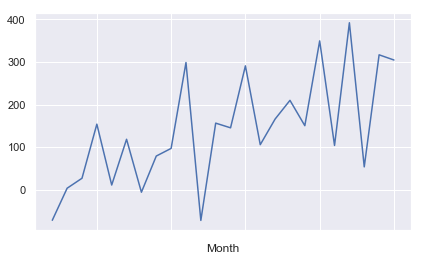

In [83]:
df['Seasonal Difference'] = df['Shampoo_Sales'] - df['Shampoo_Sales'].shift(12)
df['Seasonal Difference'].plot();

In [84]:
# Seasonal Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.04561553414249077
p-value : 0.9545931714075298
#Lags Used : 6
Number of Observations Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


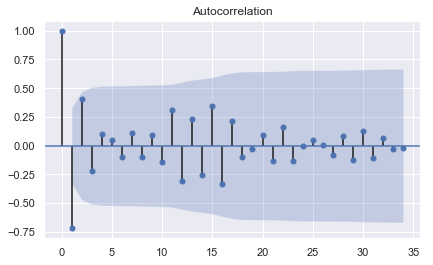

In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(df["Shampoo_Sales_first_difference"].dropna())

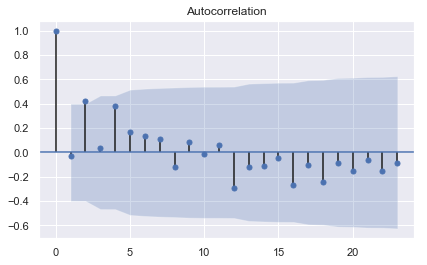

In [86]:
df["Seasonal First Difference"] =  df['Shampoo_Sales'] - df['Shampoo_Sales'].shift(12)
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

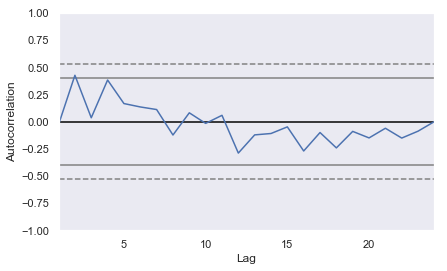

In [87]:
autocorrelation_plot(df['Seasonal First Difference'].dropna());

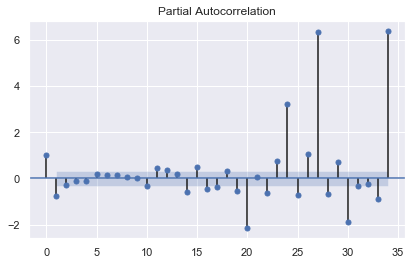

In [88]:
result = plot_pacf(df["Shampoo_Sales_first_difference"].dropna());

In [89]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

####  p,d,q parameters 
p: The number of lag observations included in the model.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.
p: the number before the first inverted bar in the ACF (we begin counting from 0) d: the number of times we differenced our time series to achieve stationarity q: the number before the first inverted bar in our PACF (we begin counting from 0)

In [90]:
df.head()

,Shampoo_Sales,Shampoo_Sales_first_difference,Seasonal Difference,Seasonal First Difference
Month,,,,
1-01,266.0,NaN,NaN,NaN
1-02,145.9,-120.1,NaN,NaN
1-03,183.1,37.2,NaN,NaN
1-04,119.3,-63.8,NaN,NaN
1-05,180.3,61.0,NaN,NaN


### ARIMA with Python
The statsmodels library provides the capability to fit an ARIMA model.
An ARIMA model can be created using the statsmodels library as follows:
Define the model by calling ARIMA() and passing in the p, d, and q parameters. The model is prepared on the training data by calling the fit() function. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted. Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.
First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.
When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 01 Sep 2019   AIC                            406.340
Time:                        20:02:45   BIC                            417.227
Sample:                             1   HQIC                           410.098
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.y     -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.y     -0.6203      0.282     -2.203      0.0

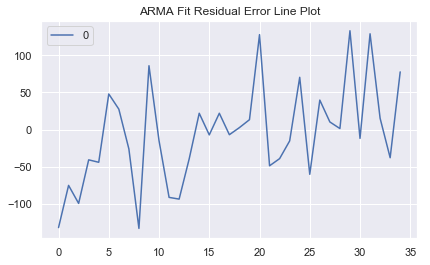

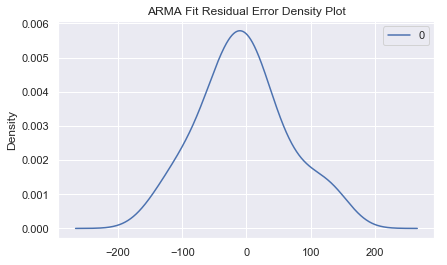

                0
count   35.000000
mean    -5.495218
std     68.132882
min   -133.296637
25%    -42.477890
50%     -7.186512
75%     24.748330
max    133.237936


In [91]:
# fit model
model = ARIMA(df['Shampoo_Sales'].values, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000

-------------------------------------------------------------
Test MSE : 6958.324

-------------------------------------------------------------


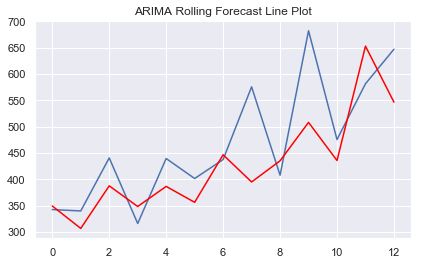

In [92]:
X = df['Shampoo_Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('\n-------------------------------------------------------------')
print('Test MSE : %.3f' % error)
print('\n-------------------------------------------------------------')
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('ARIMA Rolling Forecast Line Plot')
plt.show()

***